# PIB - ISE

## Inicando con Sharepoint 

In [79]:
#Instalar Office 365
#pip install Office365-REST-Python-Client


In [93]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from bson import json_util
import json


In [94]:
from office365.runtime.auth.authentication_context import AuthenticationContext
from office365.sharepoint.client_context import ClientContext
from office365.sharepoint.files.file import File

url = 'https://eafit.sharepoint.com/sites/Proyectoinformedecoyunturaeconomica'
username = '  '
password = '  '
relative_url = r'/sites/Proyectoinformedecoyunturaeconomica/Documentos compartidos/General/PIB ISE.xlsx'

In [95]:
ctx_auth = AuthenticationContext(url)
if ctx_auth.acquire_token_for_user(username, password):
    ctx = ClientContext(url, ctx_auth)
    web = ctx.web
    ctx.load(web)
    ctx.execute_query()
    print ("Web title: {0}".format(web.properties['Title']))

else:
    print (ctx_auth.get_last_error())

Web title: Proyecto informe de coyuntura económica


In [96]:
import io
import pandas as pd

response = File.open_binary(ctx, relative_url)

#save data to BytesIO stream
bytes_file_obj = io.BytesIO()
bytes_file_obj.write(response.content)
bytes_file_obj.seek(0) #set file object to start

#read file into pandas dataframe


0

## PIB

In [88]:
df_pib = pd.read_excel(bytes_file_obj, sheet_name = 'PIB') 

In [89]:
df_pib.head(10)

,PIB
0,6.522148
1,5.358865
2,7.639428
3,7.242352
4,6.655081
5,6.753112
6,6.861829
7,6.682140
8,5.069449
9,4.793007


In [75]:
df_pib.index = pd.period_range('2006Q1', '2020Q3', freq='Q')

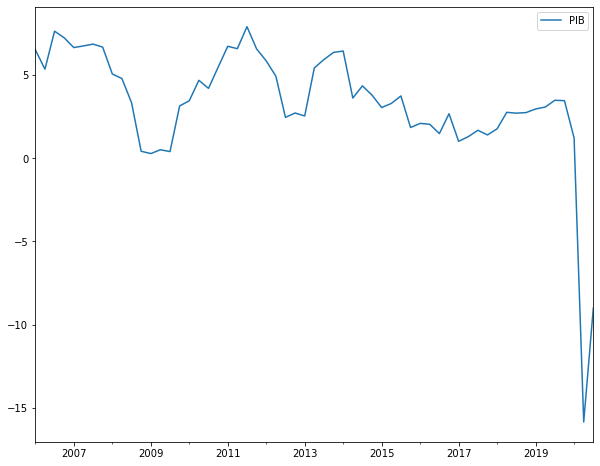

In [78]:
df_pib.plot(figsize=(10,8))

## ISE

In [70]:
df_ise = pd.read_excel(bytes_file_obj, sheet_name = 'ISE') 

In [71]:
df_ise.index = pd.period_range('2006-01-01', '2020-11-01', freq='M')

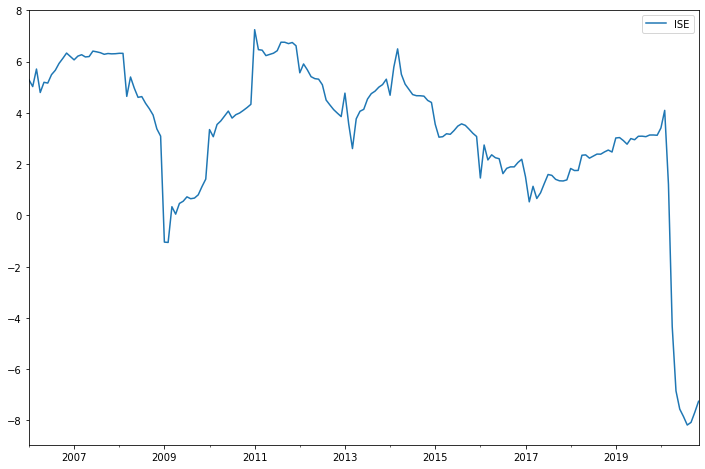

In [72]:
df_ise.plot(figsize=(12,8))

## Calidad de Cartera 

In [97]:
df_cc = pd.read_excel(bytes_file_obj, sheet_name = 'Calidadcartera') 
df_cc.index = pd.period_range('2016-01-01', '2020-11-01', freq='M')

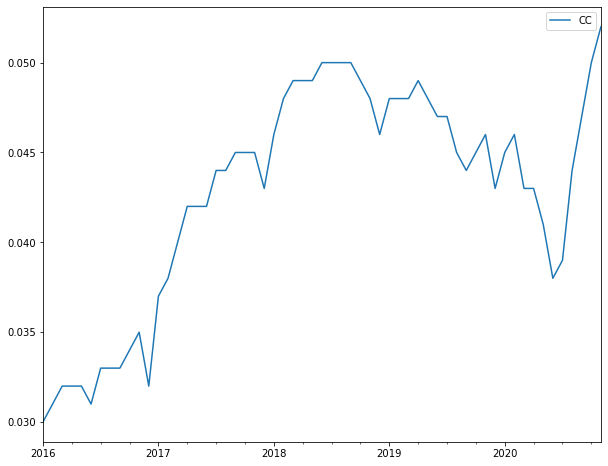

In [99]:
df_cc.plot(figsize=(10,8))

In [100]:
df_cm = pd.read_excel(bytes_file_obj, sheet_name = 'Cm') 
df_cm.index = pd.period_range('2016-01-01', '2020-11-01', freq='M')

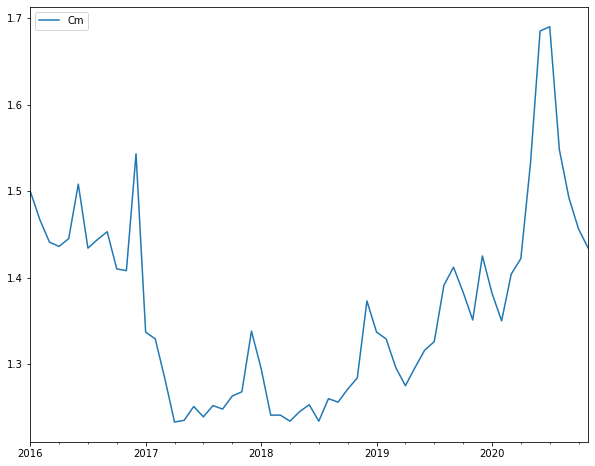

In [101]:
df_cm.plot(figsize=(10,8))